In [2]:
%matplotlib inline
"""
Read more about pd.set_option here:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html
"""
import pandas as pd; pd.set_option('display.max_columns', None)
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2020.csv')

df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Derrick Henry,TEN,RB,26.0,16,16,31,19,0,0,0,2027,17,378,114,0,314.0,0,3,2
1,Alvin Kamara,NOR,RB,25.0,15,10,107,83,0,0,0,932,16,187,756,5,295.0,0,1,0
2,Dalvin Cook,MIN,RB,25.0,14,14,54,44,0,0,0,1557,16,312,361,1,294.0,0,5,3
3,Davante Adams,GNB,WR,28.0,14,14,149,115,0,0,0,0,0,0,1374,18,243.0,0,1,1
4,Travis Kelce,KAN,TE,31.0,15,15,145,105,4,0,2,0,0,0,1416,11,208.0,0,1,1


In [4]:
"""
View the documentation for the info method here
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html
"""

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         626 non-null    object 
 1   Tm             626 non-null    object 
 2   Pos            578 non-null    object 
 3   Age            625 non-null    float64
 4   G              626 non-null    int64  
 5   GS             626 non-null    int64  
 6   Tgt            626 non-null    int64  
 7   Rec            626 non-null    int64  
 8   PassingYds     626 non-null    int64  
 9   PassingTD      626 non-null    int64  
 10  PassingAtt     626 non-null    int64  
 11  RushingYds     626 non-null    int64  
 12  RushingTD      626 non-null    int64  
 13  RushingAtt     626 non-null    int64  
 14  ReceivingYds   626 non-null    int64  
 15  ReceivingTD    626 non-null    int64  
 16  FantasyPoints  570 non-null    float64
 17  Int            626 non-null    int64  
 18  Fumbles   

In [5]:
pd.set_option('chained_assignment', None) # we don't care about overriding the original df

# you could also do rb_df = df.loc[df['Pos'] == 'RB'].copy()
rb_df = df.loc[df['Pos'] == 'RB']

# Usage is defined as Tgt + RushingAtt
rb_df['Usage/G'] = (rb_df['Tgt'] + rb_df['RushingAtt']) / rb_df['G'] 

"""
Here, we're just looking at the last column of our DataFrame here.
"""

rb_df.iloc[:, -1:].head()

,Usage/G
0,25.562500
1,19.600000
2,26.142857
11,18.066667
12,18.857143


In [6]:
fantasy_scoring_weights = {
    'RushingYds': 0.1,
    'ReceivingYds': 0.1,
    'ReceivingTD': 6,
    'RushingTD': 6,
    'FumblesLost': -2,
    'Rec': 1 # adjust for PPR
}

"""
Here, we are using apply with axis=1
This allows to map a function across an entire row, instead of across a column.
To learn more information about apply and setting axis=1,
check out the pandas documentation.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
"""

def get_fantasy_points(row):
    
    g = row['G'] # access the G column
    
    fantasy_points = sum([row[column]*weight for column, weight in fantasy_scoring_weights.items()])
    
    return fantasy_points / g

# create a FantasyPoints/G column
rb_df['FantasyPoints/G'] = rb_df.apply(get_fantasy_points, axis=1)

"""
The columns we need here are our Player, Tm, G, all relevant RB columns, Usage/G and FantasyPoints/G (which were just assigned)
"""

rb_df = rb_df[['Player', 'Tm', 'G', 'RushingAtt', 'Tgt'] + list(fantasy_scoring_weights.keys()) + ['Usage/G', 'FantasyPoints/G']]

rb_df.head()

,Player,Tm,G,RushingAtt,Tgt,RushingYds,ReceivingYds,ReceivingTD,RushingTD,FumblesLost,Rec,Usage/G,FantasyPoints/G
0,Derrick Henry,TEN,16,378,31,2027,114,0,17,2,19,25.562500,20.693750
1,Alvin Kamara,NOR,15,187,107,932,756,5,16,0,83,19.600000,25.186667
2,Dalvin Cook,MIN,14,312,54,1557,361,1,16,3,44,26.142857,23.700000
11,Jonathan Taylor,IND,15,232,39,1169,299,1,11,1,36,18.066667,16.853333
12,Aaron Jones,GNB,14,201,63,1104,355,2,9,0,47,18.857143,18.492857


c:\Users\alexc\Documents\Programming\Python\Data-Science-Final-Project\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RushingAtt', ylabel='Tgt'>

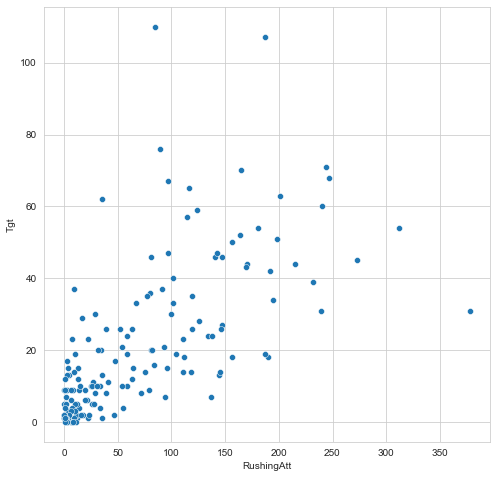

In [7]:
sns.set_style('whitegrid') # setting style for visualizations

"""
seaborn documentation for scatter plots:
https://seaborn.pydata.org/generated/seaborn.scatterplot.html
"""

# set figure size in inches
# https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.figure.html
plt.figure(figsize=(8, 8))

sns.scatterplot(rb_df['RushingAtt'], rb_df['Tgt'])

<AxesSubplot:xlabel='Usage/G', ylabel='FantasyPoints/G'>

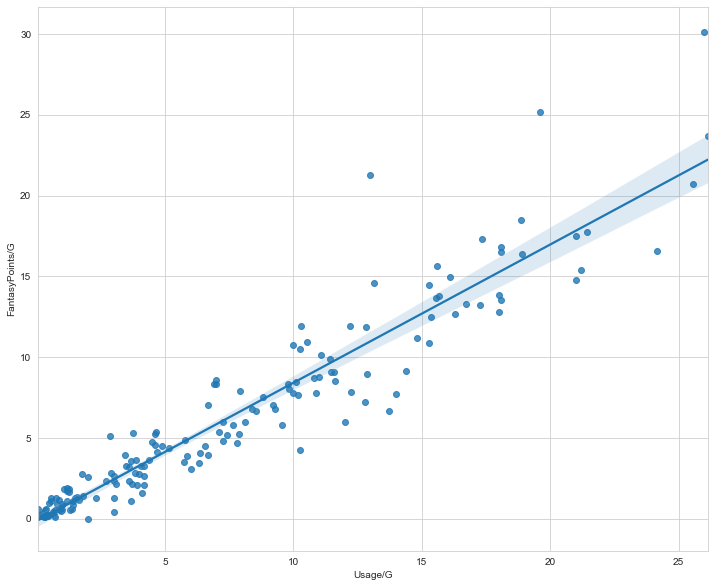

In [8]:
"""
documentation for sns.regplot
https://seaborn.pydata.org/generated/seaborn.regplot.html
"""

plt.figure(figsize=(12, 10))
sns.regplot(x=rb_df['Usage/G'], y=rb_df['FantasyPoints/G'])

<AxesSubplot:xlabel='RushingAtt', ylabel='Count'>

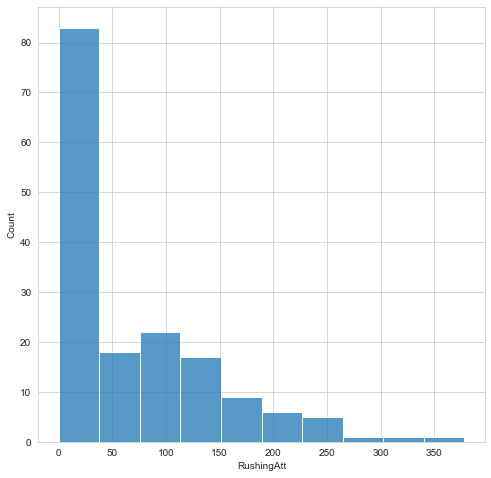

In [9]:
# distplot for RB rushing attempts
# https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot
plt.figure(figsize=(8, 8))
sns.histplot(rb_df['RushingAtt'])

c:\Users\alexc\Documents\Programming\Python\Data-Science-Final-Project\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RushingAtt', ylabel='Tgt'>

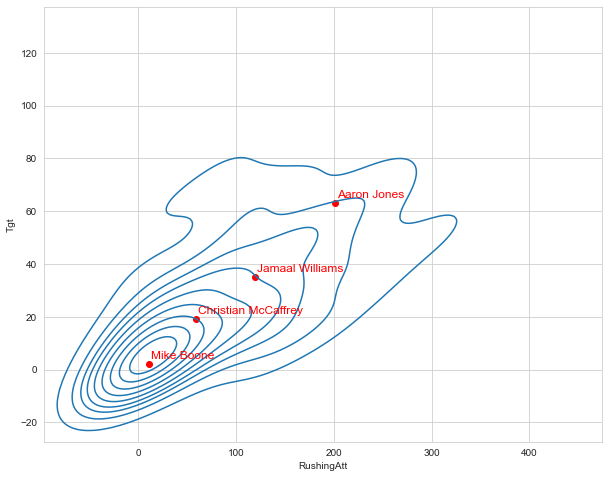

In [10]:
"""
Here, we use the object-oriented API for matplotlib to be able to have greater
control over our plot.
We can use the fig and ax objects we get back from the plt.subplots function to annotate points
for example.
https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.subplots.html
matplotlib Axes object
https://matplotlib.org/3.3.0/api/axes_api.html
matplotlib Figure object
https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.figure.Figure.html
"""

fig, ax = plt.subplots(figsize=(10, 8))

notable_players = [
    'Christian McCaffrey', 'Aaron Jones', 'Jamaal Williams', 'Mike Boone'
]

for player_name in notable_players:
    
    player = rb_df.loc[rb_df['Player'] == player_name]
    
    # if our df we get back is not empty, run the code below
    if not player.empty:
        # grab targets and rushing attempts
        targets = player['Tgt']
        rushes = player['RushingAtt']
        """
        plt.annotate documentation is available here:
        
        """
        ax.annotate(player_name, xy=(rushes+2, targets+2), color='red', fontsize=12)
        ax.scatter(rushes, targets, color='red')
    
# set ax parameter to the ax we created above with plt.subplots
sns.kdeplot(rb_df['RushingAtt'], rb_df['Tgt'], ax=ax)

c:\Users\alexc\Documents\Programming\Python\Data-Science-Final-Project\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


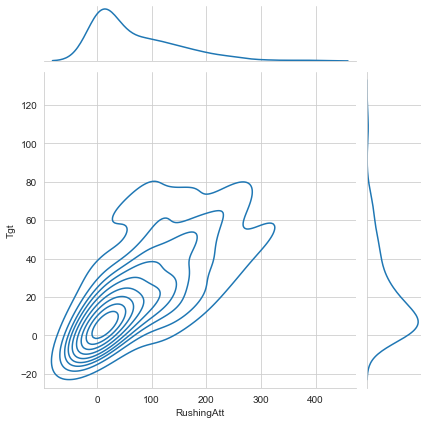

In [11]:
sns.jointplot(rb_df['RushingAtt'], rb_df['Tgt'], kind='kde')

c:\Users\alexc\Documents\Programming\Python\Data-Science-Final-Project\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


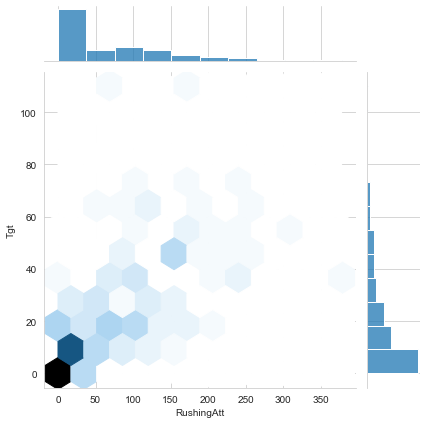

In [12]:
sns.jointplot(rb_df['RushingAtt'], rb_df['Tgt'], kind='hex')

c:\Users\alexc\Documents\Programming\Python\Data-Science-Final-Project\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


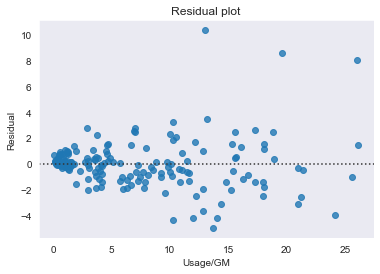

In [13]:
sns.set_style('dark') # changing up the style

sns.residplot(rb_df['Usage/G'], rb_df['FantasyPoints/G'])
plt.title('Residual plot')
plt.xlabel('Usage/GM') # this is how we set an x label in matplotlib
plt.ylabel('Residual') # this is how we set a y label in matplotlib
plt.show() # show our plot

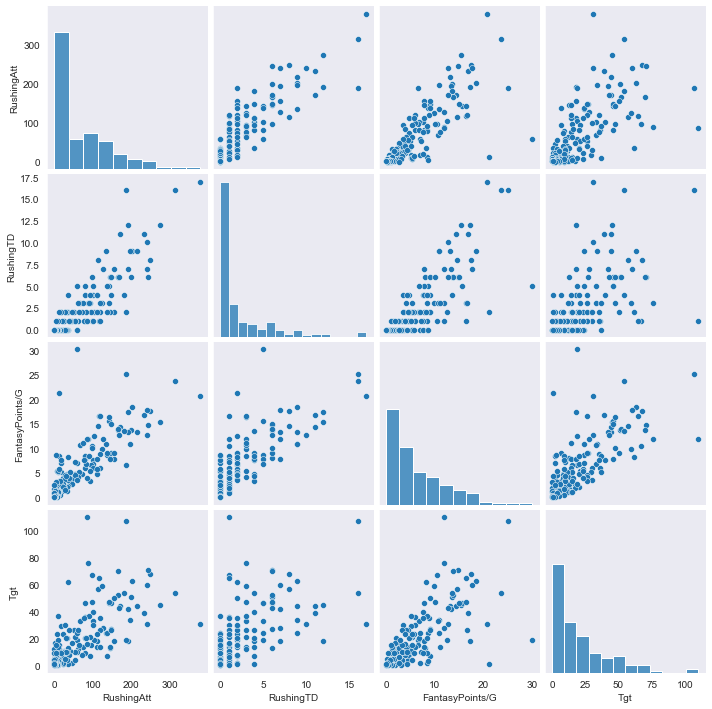

In [14]:
rb_df_copy = rb_df[[
    'RushingAtt', 'RushingTD', 'FantasyPoints/G', 'Tgt'
]]

sns.pairplot(rb_df_copy)

In [15]:
final_df = pd.DataFrame()

#note the curly braces in the string format. This allows the string to be updated with the format string method.
WEEKLY_BASE_URL = 'https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week{week_num}.csv'

for week in range(1, 18):
    df = pd.read_csv(WEEKLY_BASE_URL.format(week_num=week)) # index_col=0 not necessary here. Data is properly formatted with Unnamed: 0 column
    df['Week'] = week
    final_df = pd.concat([final_df, df])
    
print(final_df.shape)
final_df.head()

(4779, 20)


,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,Rec,Tgt,ReceivingYds,ReceivingTD,FL,PPRFantasyPoints,StandardFantasyPoints,HalfPPRFantasyPoints,Week
0,Lamar Jackson,QB,BAL,324.0,5.0,0.0,20.0,17.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,33.56,33.56,33.56,1
1,Dak Prescott,QB,DAL,405.0,4.0,0.0,32.0,25.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,33.40,33.40,33.40,1
2,Robert Griffin,QB,BAL,55.0,1.0,0.0,6.0,6.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,7.10,7.10,7.10,1
3,Patrick Mahomes,QB,KAN,378.0,3.0,0.0,33.0,25.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,27.32,27.32,27.32,1
4,Kirk Cousins,QB,MIN,98.0,1.0,0.0,10.0,8.0,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,14.32,14.32,14.32,1


In [16]:
lamar = final_df.loc[final_df['Player'] == 'Lamar Jackson']
mahomes = final_df.loc[final_df['Player'] == 'Patrick Mahomes']
wilson = final_df.loc[final_df['Player'] == 'Russell Wilson']

lamar

,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,Rec,Tgt,ReceivingYds,ReceivingTD,FL,PPRFantasyPoints,StandardFantasyPoints,HalfPPRFantasyPoints,Week
0,Lamar Jackson,QB,BAL,324.0,5.0,0.0,20.0,17.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,33.56,33.56,33.56,1
7,Lamar Jackson,QB,BAL,272.0,2.0,0.0,37.0,24.0,16.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,30.88,30.88,30.88,2
28,Lamar Jackson,QB,BAL,267.0,0.0,0.0,43.0,22.0,8.0,46.0,1.0,0.0,0.0,0.0,0.0,0.0,21.28,21.28,21.28,3
13,Lamar Jackson,QB,BAL,247.0,3.0,2.0,34.0,24.0,9.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,24.48,24.48,24.48,4
31,Lamar Jackson,QB,BAL,161.0,1.0,3.0,28.0,19.0,14.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,11.44,11.44,11.44,5
15,Lamar Jackson,QB,BAL,236.0,0.0,0.0,33.0,21.0,19.0,152.0,1.0,0.0,0.0,0.0,0.0,0.0,30.64,30.64,30.64,6
27,Lamar Jackson,QB,BAL,143.0,0.0,0.0,20.0,9.0,14.0,116.0,1.0,0.0,0.0,0.0,0.0,0.0,23.32,23.32,23.32,7
11,Lamar Jackson,QB,BAL,163.0,1.0,0.0,23.0,17.0,16.0,61.0,2.0,0.0,0.0,0.0,0.0,0.0,28.62,28.62,28.62,9
0,Lamar Jackson,QB,BAL,223.0,3.0,0.0,17.0,15.0,7.0,65.0,1.0,0.0,0.0,0.0,0.0,0.0,33.42,33.42,33.42,10
1,Lamar Jackson,QB,BAL,222.0,4.0,0.0,24.0,17.0,10.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,32.78,32.78,32.78,11


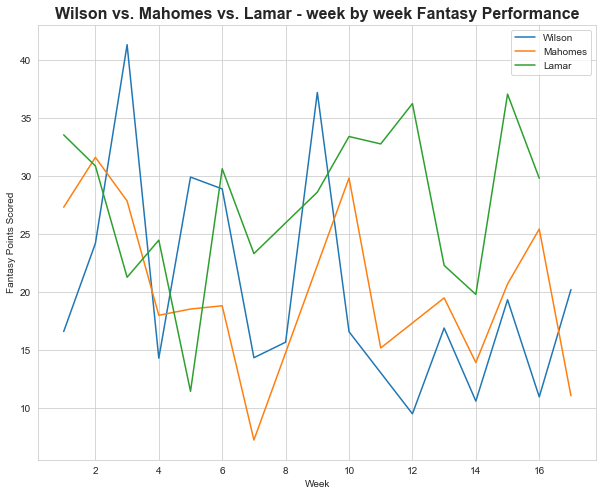

In [17]:
sns.set_style('whitegrid') # setting style
plt.subplots(figsize=(10, 8)) # setting figure size
plt.plot(wilson['Week'], wilson['StandardFantasyPoints']) # first argument is x, second is y
plt.plot(mahomes['Week'], mahomes['StandardFantasyPoints'])
plt.plot(lamar['Week'], lamar['StandardFantasyPoints'])
plt.legend(['Wilson', 'Mahomes', 'Lamar']) # setting legend in order of how we plotted things
plt.xlabel('Week')
plt.ylabel('Fantasy Points Scored')
plt.title('Wilson vs. Mahomes vs. Lamar - week by week Fantasy Performance', fontsize=16, fontweight='bold') # adjusting font size to 16px
plt.show() # show our visualization, not completely necessary, but surpresses unneccessary output from matplotlib

<AxesSubplot:>

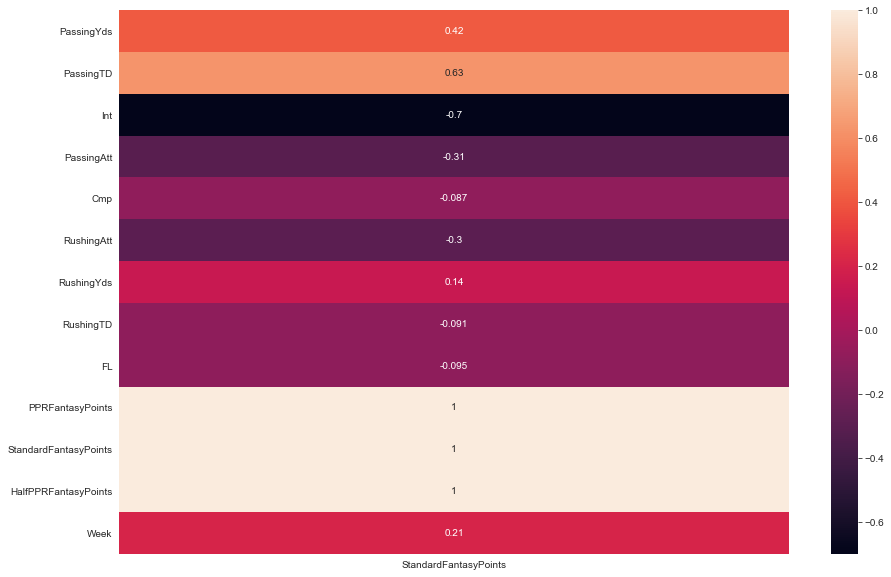

In [18]:
import numpy as np
plt.figure(figsize=(15, 10))
lamar = lamar.drop(['Rec', 'Tgt', 'ReceivingYds', 'ReceivingTD'], axis=1) # dropping non-relevant fantasy stats
sns.heatmap(lamar.corr()[['StandardFantasyPoints']], annot=True)

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv').iloc[:, 1:]
print(df.dtypes)
df_copy = df.copy(deep=True)

fantasy_scoring_weights = {
    'RushingYds': 0.1,
    'ReceivingYds': 0.1,
    'ReceivingTD': 6,
    'RushingTD': 6,
    'FumblesLost': -2,
    'PassingYds': 0.04,
    'PassingTD': 4,
    'Int': -2,
    'Rec': 1 # adjust for PPR
}

def get_fantasy_points(row):
    
    g = row['G'] # access the G column
    
    fantasy_points = sum([row[column]*weight for column, weight in fantasy_scoring_weights.items()])
    
    return fantasy_points / g

df_copy.loc[:, 'Usage/Gm'] = (df['PassingAtt'] + df['Tgt'] + df['RushingAtt'])/df['G']
df_copy.loc[:, 'FantasyPoints/Gm'] = df.apply(get_fantasy_points, axis=1)

Player            object
Tm                object
Pos               object
Age              float64
G                float64
GS               float64
Tgt              float64
Rec              float64
PassingYds       float64
PassingTD        float64
PassingAtt       float64
RushingYds       float64
RushingTD        float64
RushingAtt       float64
ReceivingYds     float64
ReceivingTD      float64
FantasyPoints    float64
Int              float64
Fumbles          float64
FumblesLost      float64
dtype: object


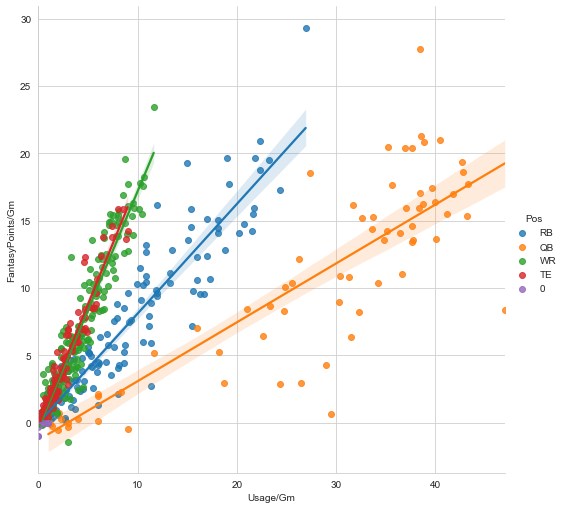

In [20]:
sns.lmplot(data=df_copy, x='Usage/Gm', y='FantasyPoints/Gm', hue='Pos', height=7)

<AxesSubplot:>

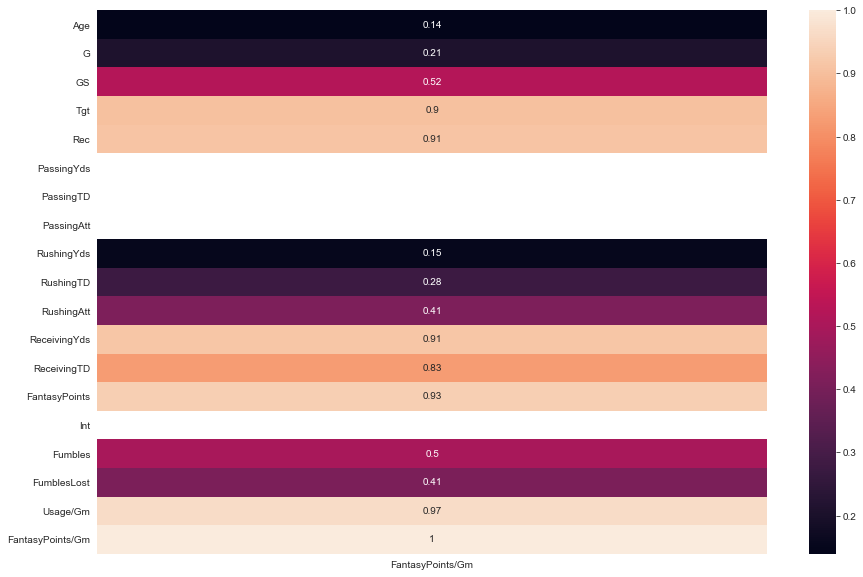

In [21]:
corr = df_copy.loc[df_copy['Pos'] == 'TE'].corr()[['FantasyPoints/Gm']]
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)

In [22]:
COMBINE_URL = "https://raw.githubusercontent.com/fantasydatapros/data/master/combine/combine00to20.csv"

"""
The first two columns of this CSV file are messed up. Using iloc to grab all rows (:), and then grab the column indexed at 2 (so the third column), all the way to the last.
"""
combine_df = pd.read_csv(COMBINE_URL).iloc[:, 2:] # this is subject to change as I clean the data
combine_df.head()

,Rk,Year,Player,Pos,Age,AV,School,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr)
0,1,2000,Bashir Yamini,WR,22.0,0,Iowa,6-3,191,4.53,33.0,NaN,130.0,7.09,4.18,NaN
1,2,2000,James Williams,WR,22.0,4,Marshall,5-11,180,4.59,36.0,NaN,123.0,7.22,4.16,Seattle Seahawks / 6th / 175th pick / 2000
2,3,2000,Dez White,WR,20.0,19,Georgia Tech,6-1,218,4.62,37.5,NaN,124.0,6.91,4.09,Chicago Bears / 3rd / 69th pick / 2000
3,4,2000,Peter Warrick,WR,22.0,30,Florida State,5-11,194,4.58,NaN,NaN,NaN,NaN,NaN,Cincinnati Bengals / 1st / 4th pick / 2000
4,5,2000,Troy Walters,WR,23.0,13,Stanford,5-6,171,4.55,32.5,NaN,106.0,6.61,3.84,Minnesota Vikings / 5th / 165th pick / 2000


In [23]:
"""
Here, we groupby the column Pos, and then print out descriptive statistics for the data using the describe method.
Try messing with this code and repeating this process for other columns as well.
Documentation for groupby
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
Documentation for describe
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
"""

combine_df.groupby('Pos')['40YD'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,209.0,4.813445,0.176743,4.33,4.71,4.82,4.91,5.37
RB,414.0,4.536739,0.102188,4.24,4.46,4.54,4.60,4.84
TE,268.0,4.755784,0.137573,4.37,4.66,4.77,4.84,5.06
WR,612.0,4.493513,0.097411,4.22,4.42,4.50,4.56,4.79


<AxesSubplot:xlabel='Pos', ylabel='40YD'>

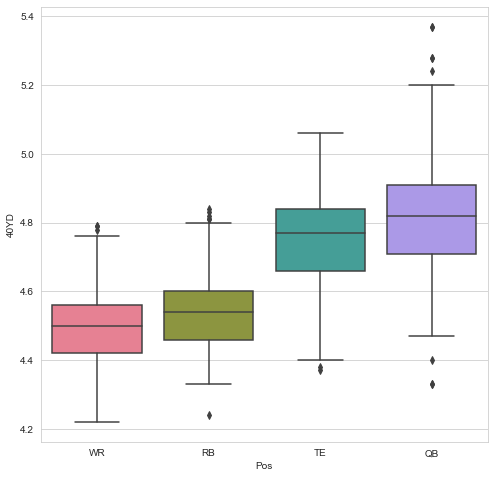

In [24]:
plt.figure(figsize=(8, 8))

"""
Information on how you can adjust the palette argument of this function
and all seaborn functions can be found here
https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
Essentially, you need to create a palette object using the color_palette function
"""
sns.boxplot(x='Pos', y='40YD', data=combine_df, palette=sns.color_palette("husl", n_colors=4))